4.10.1 

In this data their are first and last names that present PPI risks. However, since their are no home or email adresses and the data spans the whole U.S. their is no signifcant risk of traceback. As such, our analysis will proceed without further measures.

## Outline

1. Outline

2. Import

3. Excel Crosstab

4. Asessing Spend by Region

    4.1 Flagging States to Regions

5. Creating a Sample from POC

    5.1 Asigning region to POC data frame

    5.2 Determing Spending Habits between Divisions

6. Order Frequncey flag

7. Export

## Import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
poc = pd.read_pickle ('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/poc.pkl')

In [3]:
poc.head(3)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,order_freq,order_freq_flag,first_name,last_name,gender,state,age,n_dependants,martial_status,income
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,Soda,77,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


## Excel Crosstab

In [4]:
crosstab = pd.crosstab(poc['days_since_prior_order'], poc['order_number'], dropna = False)

In [5]:
crosstab.to_clipboard()

## Assessing Spend by Region

### Flagging states to regions

In [4]:
def region(row):
    if row['state'] in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        return '1'
    elif row['state'] in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        return '2'
    elif row['state'] in ['Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        return '3'
    elif row['state'] in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        return '4'
    else:
        return 'Not enough data'


In [5]:
poc.shape

(30629741, 28)

## Using Loc to Asign Regions

In [6]:
#Flagging States Using Loc
state_region = {
    'Maine': 1, 'New Hampshire': 1, 'Vermont': 1, 'Massachusetts': 1, 'Rhode Island': 1, 'Connecticut': 1, 'New York': 1, 'Pennsylvania': 1, 'New Jersey': 1,
    'Wisconsin': 2, 'Michigan': 2, 'Illinois': 2, 'Indiana': 2, 'Ohio': 2, 'North Dakota': 2, 'South Dakota': 2, 'Nebraska': 2, 'Kansas': 2, 'Minnesota': 2, 'Iowa': 2, 'Missouri': 2,
    'Delaware': 3, 'Maryland': 3, 'District of Columbia': 3, 'Virginia': 3, 'West Virginia': 3, 'North Carolina': 3, 'South Carolina': 3, 'Georgia': 3, 'Florida': 3, 'Kentucky': 3, 'Tennessee': 3, 'Mississippi': 3, 'Alabama': 3, 'Oklahoma': 3, 'Texas': 3, 'Arkansas': 3, 'Louisiana': 3,
    'Idaho': 4, 'Montana': 4, 'Wyoming': 4, 'Nevada': 4, 'Utah': 4, 'Colorado': 4, 'Arizona': 4, 'New Mexico': 4, 'Alaska': 4, 'Washington': 4, 'Oregon': 4, 'California': 4, 'Hawaii': 4}


In [7]:
poc.loc[:, 'region'] = poc['state'].map(state_region).fillna('Not enough data')

In [8]:
poc.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,order_freq_flag,first_name,last_name,gender,state,age,n_dependants,martial_status,income,region
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,3
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,3


### Determing Spending Habits between Regions

In [12]:
#Bar Chart

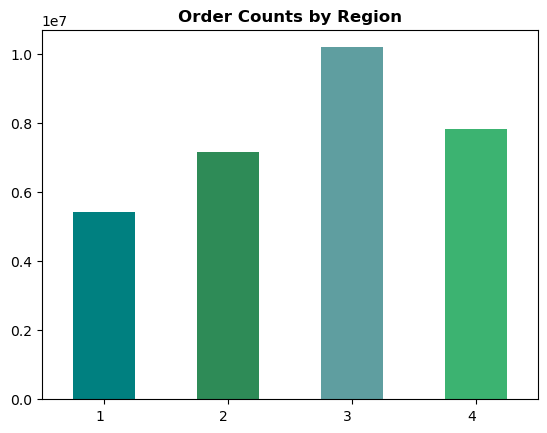

In [13]:
poc_bar = poc['region'].value_counts().sort_index().plot.bar(color = ['teal', 'seagreen', 'cadetblue', 'mediumseagreen'])
plt.title('Order Counts by Region', fontweight = 'bold')
plt.xticks(rotation=0, ha='right')
plt.show()

In [14]:
#line chart

Text(0.5, 1.0, 'Income by Region')

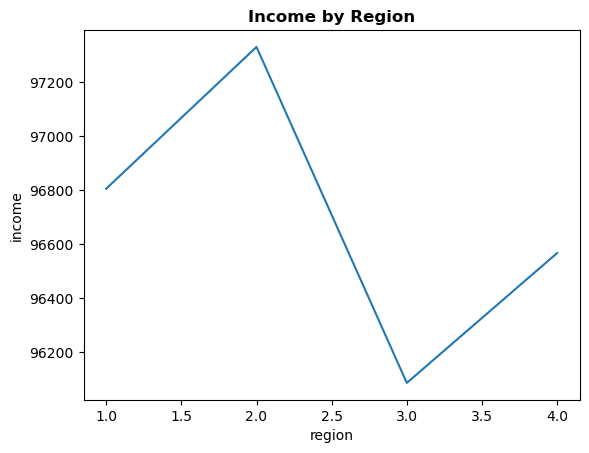

In [15]:
poc_med = poc.groupby('region').median('income').reset_index()
poc_line = sns.lineplot(data=poc_med, x='region', y='income')
plt.title('Income by Region', fontweight = 'bold')


In [16]:
poc_means = poc.groupby('region').mean('income')

In [17]:
poc_means.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,aisle_id,department_id,prices,order_freq,age,n_dependants,income
region,,,,,,,,,,,,,,,
1,1.708722e+06,102776.378521,17.241567,2.733039,13.425826,11.074020,25596.589892,0.590789,71.234692,9.931685,11.594699,10.373893,49.648471,1.505338,99665.801343
2,1.712949e+06,103228.731330,16.916136,2.737709,13.443428,11.188121,25615.093135,0.586962,71.184423,9.912393,12.814354,10.463537,49.465295,1.488324,100283.882847
3,1.710342e+06,102687.106569,17.106050,2.741394,13.417406,11.116169,25606.887726,0.589682,71.216610,9.907838,12.043691,10.405956,49.329435,1.505423,98971.136272
4,1.710637e+06,103275.187531,17.255927,2.737592,13.418388,11.057400,25586.716948,0.590729,71.163198,9.926939,11.152004,10.372334,49.547422,1.506638,99198.365313


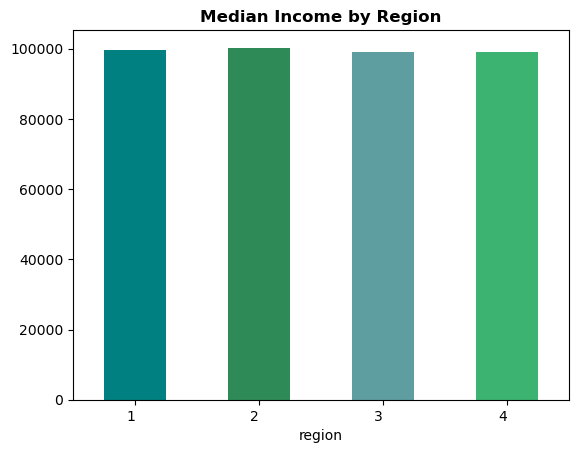

In [18]:
poc_bar5 = poc_means['income'].sort_index().plot.bar(color=['teal', 'seagreen', 'cadetblue', 'mediumseagreen'])
plt.title('Median Income by Region', fontweight='bold')
plt.xticks(rotation=0, ha='right')
plt.show()

Line Chart; Spend flag vs Region Flag

In [19]:
poc.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days_2', 'order_amount', 'loyalty_flag', 'spend_flag',
       'order_freq', 'order_freq_flag', 'first_name', 'last_name', 'gender',
       'state', 'age', 'n_dependants', 'martial_status', 'income', 'region'],
      dtype='object')

In [10]:
#bar chart; region vs spend_flag

In [11]:
poc_spendflag = poc.groupby('region')['spend_flag'].value_counts()

In [12]:
poc_spendflag

region  spend_flag  
1       Low spender      5320605
        High spender      101420
2       Low spender      7027107
        High spender      149817
3       Low spender     10002459
        High spender      196523
4       Low spender      7684007
        High spender      147803
Name: spend_flag, dtype: int64

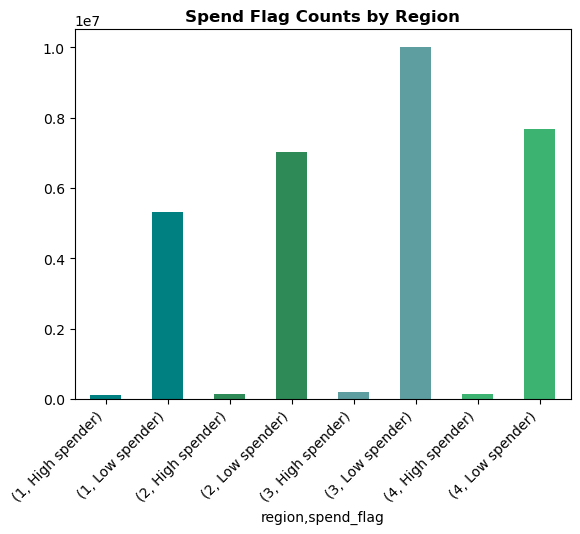

In [13]:
poc_bar2 = poc_spendflag.sort_index().plot.bar(color=['teal', 'teal', 'seagreen', 'seagreen', 'cadetblue', 'cadetblue', 'mediumseagreen', 'mediumseagreen'])
plt.title('Spend Flag Counts by Region', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

## Order Frequncey flag

In [24]:
poc['order_freq'].mean()

10.405175366186636

In [25]:
poc['high_freq'] = poc['order_freq'] > 5

In [26]:
poc.head(2)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,reordered,product_name,aisle_id,...,first_name,last_name,gender,state,age,n_dependants,martial_status,income,region,high_freq
0,2539329,1,1,2,8,NaN,196.0,0.0,Soda,77,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,3,True
1,2398795,1,2,3,7,15.0,196.0,1.0,Soda,77,...,Linda,Nguyen,Female,Alabama,31,3,married,40423,3,True


In [27]:
poc['high_freq'].value_counts()

True     23956510
False     6673231
Name: high_freq, dtype: int64

In [28]:
poc_hf = poc[poc['high_freq']== True]

In [29]:
poc_hf['high_freq'].value_counts()

True    23956510
Name: high_freq, dtype: int64

## Export

In [9]:
#Poc DF with Region
poc.to_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/Poc DF with Region.pkl', )

In [31]:
#High Freq Customer Data Base from Poc
poc_hf.to_pickle('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/High Freq Customer Data Base from Poc.pkl', )

In [32]:
#Order Counts by Region; Bar Chart
poc_bar.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Order Counts by Region; Bar Chart.png'))

In [33]:
#Income by Region; Line Chart
poc_line.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Income by Region; Line Chart.png'))

In [34]:
#Income by Region; Bar Chart
poc_bar5.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Income by Region; Bar Chart.png'))

In [14]:
#Spend Flag Count by Region; Bar Chart
poc_bar2.figure.savefig(os.path.join('/Users/christinarandall/Documents/Career Foundry Projects/Achievment 4/Data/Prepared Data/PNGs', 'Spend Flag Counts by Region; Bar Chart.png'))